In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\Shin\Desktop\for-kr-pjt\NoonMap-Project\data\file_data\교량_기준_임시_최종db.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4097832 entries, 0 to 4097831
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   Unnamed: 0.1        int64  
 2   bridge_name         object 
 3   address             object 
 4   etc_address         object 
 5   latitude            float64
 6   longitude           float64
 7   brid_height_origin  float64
 8   location_start      object 
 9   wl_station_code     int64  
 10  rf_station_code     int64  
 11  obs_date            object 
 12  WL                  float64
 13  rainfall            float64
 14  bridge_height       float64
dtypes: float64(6), int64(4), object(5)
memory usage: 469.0+ MB


In [4]:
df['obs_date'] = pd.to_datetime(df['obs_date'])

In [5]:
bridge_list = pd.unique(df['location_start']).tolist()

In [6]:
len(bridge_list)

54

In [72]:
# 교량을 기준으로 데이터프레임 분리
df_list = [df[df['location_start']==i] for i in bridge_list]

In [73]:
# 불필요한 열 제거, 날짜순으로 정렬 뒤 인덱스 재설정
for i in range(len(bridge_list)):
    df_list[i] = df_list[i].drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'bridge_name', 'address', 'etc_address', 'latitude', 'longitude',
                                          'location_start', 'wl_station_code', 'rf_station_code', 'rainfall', 'brid_height_origin', 'bridge_height'])
    df_list[i].sort_values(['obs_date'], inplace=True)
    df_list[i].reset_index(drop=True, inplace=True)
    df_list[i].rename({'obs_date':'time', 'WL':'value'}, axis=1, inplace=True)

In [75]:
df_list[0]

,time,value
0,2010-02-25 12:00:00,3.0
1,2010-02-25 13:00:00,6.0
2,2010-02-25 14:00:00,10.0
3,2010-02-25 15:00:00,14.0
4,2010-02-25 16:00:00,18.0
...,...,...
84484,2020-08-26 21:00:00,12.0
84485,2020-08-26 22:00:00,12.0
84486,2020-08-26 23:00:00,16.0
84487,2020-08-27 00:00:00,17.0


In [10]:
import matplotlib.pyplot as plt

In [11]:
import numpy as np

In [12]:
from datetime import datetime 

In [28]:
from sklearn.model_selection import train_test_split

In [495]:
# 각 데이터프레임마다 test data의 비율이 0.4가 되도록 설정
split_date = []
for i in range(len(df_list)):
    idx = len(train_test_split(df_list[i], test_size=.4)[0])
    split_date.append(df_list[i]['time'][idx])

In [496]:
split_date

[Timestamp('2016-09-13 21:00:00'),
 Timestamp('2016-09-13 21:00:00'),
 Timestamp('2016-09-13 21:00:00'),
 Timestamp('2016-09-13 21:00:00'),
 Timestamp('2019-02-18 20:00:00'),
 Timestamp('2019-06-08 10:00:00'),
 Timestamp('2016-05-14 18:00:00'),
 Timestamp('2016-08-22 07:00:00'),
 Timestamp('2016-06-06 21:00:00'),
 Timestamp('2016-08-10 01:00:00'),
 Timestamp('2016-12-01 12:00:00'),
 Timestamp('2016-06-01 17:00:00'),
 Timestamp('2017-12-27 04:00:00'),
 Timestamp('2019-02-18 20:00:00'),
 Timestamp('2016-05-24 00:00:00'),
 Timestamp('2020-01-25 01:00:00'),
 Timestamp('2017-12-27 01:00:00'),
 Timestamp('2016-05-24 20:00:00'),
 Timestamp('2016-10-30 11:00:00'),
 Timestamp('2016-05-23 16:00:00'),
 Timestamp('2016-12-02 20:00:00'),
 Timestamp('2016-08-21 09:00:00'),
 Timestamp('2016-05-24 00:00:00'),
 Timestamp('2016-09-07 12:00:00'),
 Timestamp('2017-03-04 17:00:00'),
 Timestamp('2016-07-17 13:00:00'),
 Timestamp('2014-09-20 03:00:00'),
 Timestamp('2016-07-18 19:00:00'),
 Timestamp('2016-07-

In [497]:
train_value = [df_list[i][df_list[i]['time'] < split_date[i]]['value'] for i in range(len(df_list))]

In [498]:
test_value = [df_list[i][df_list[i]['time'] >= split_date[i]]['value'] for i in range(len(df_list))]

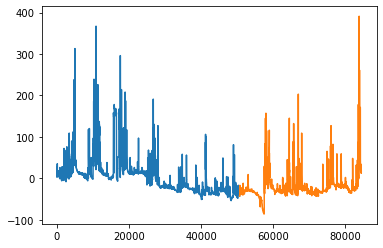

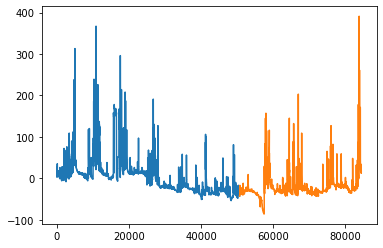

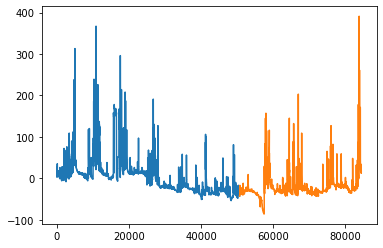

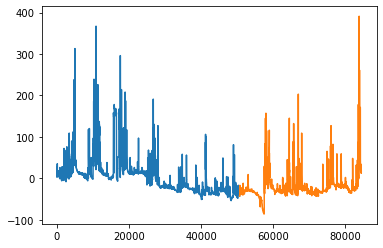

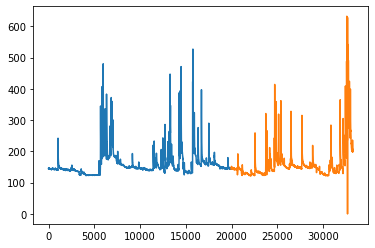

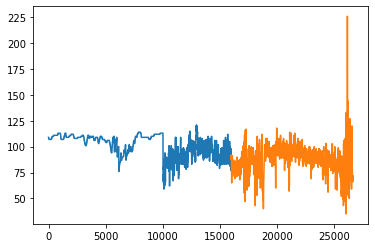

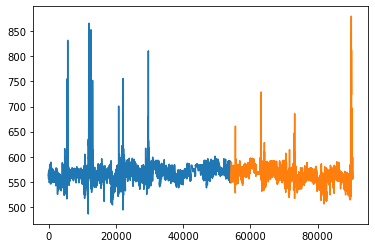

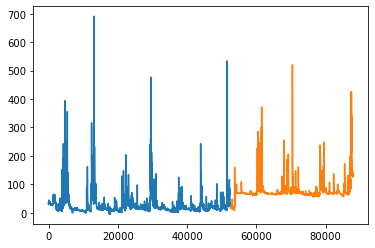

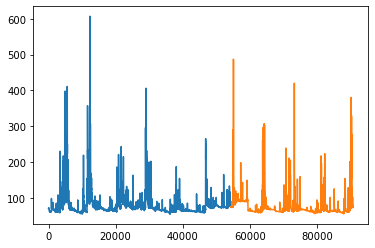

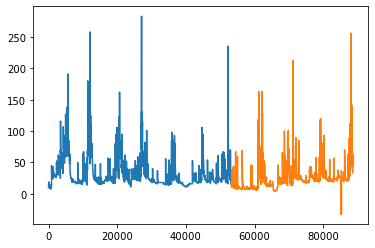

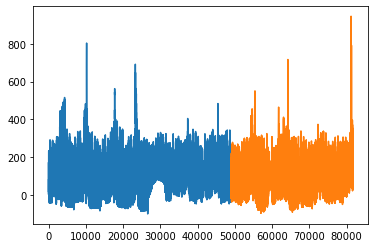

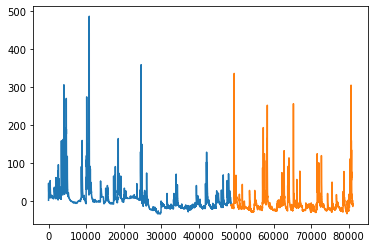

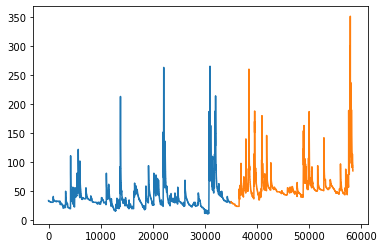

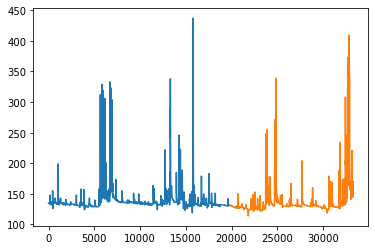

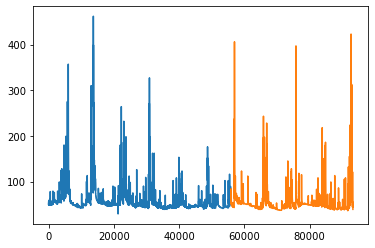

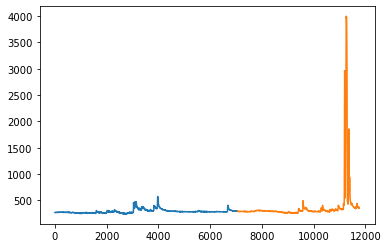

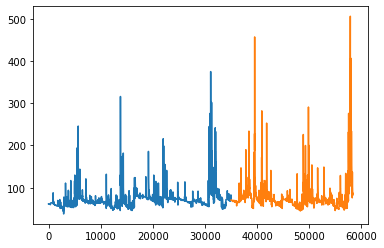

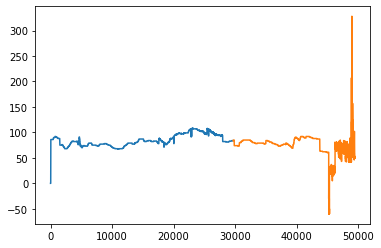

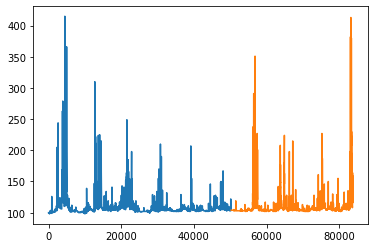

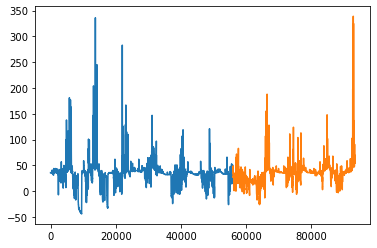

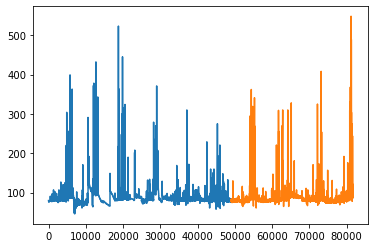

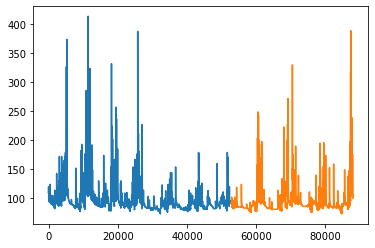

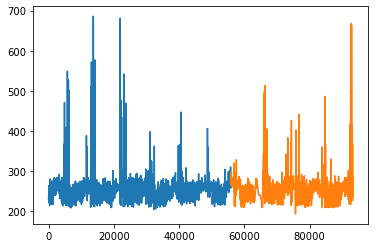

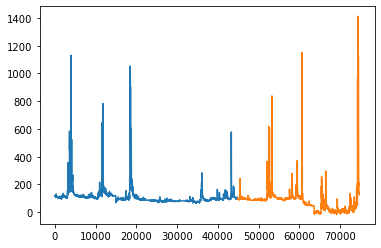

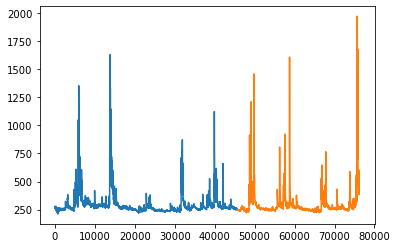

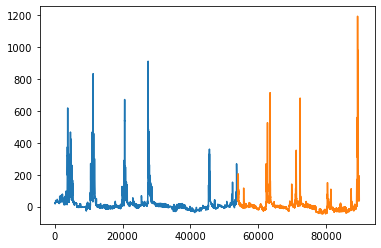

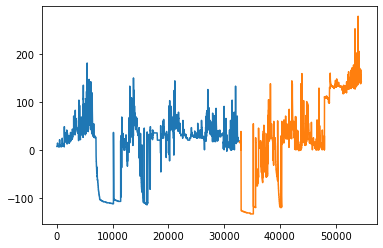

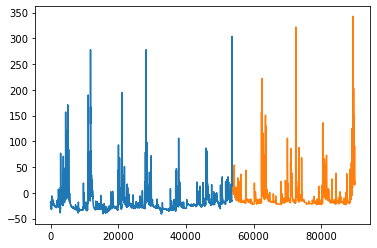

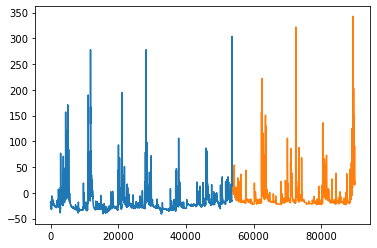

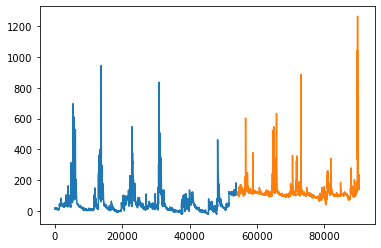

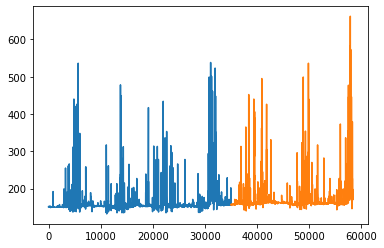

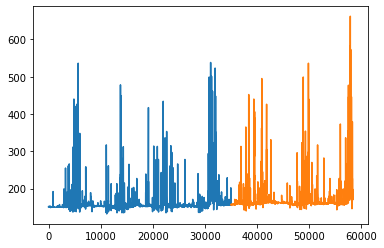

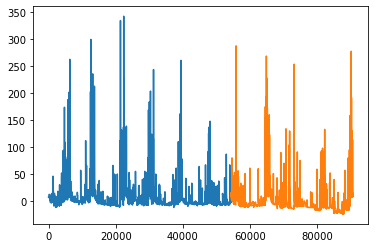

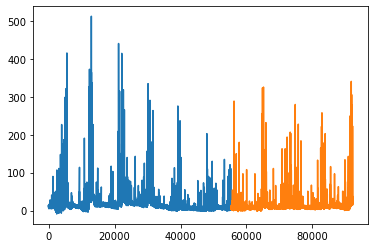

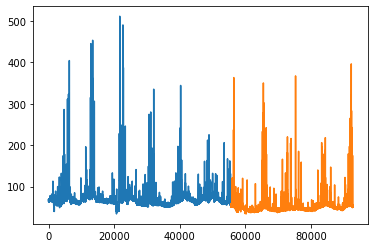

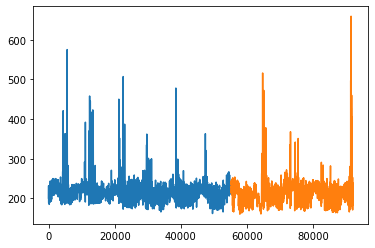

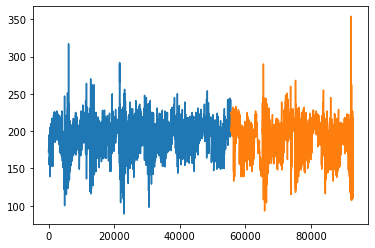

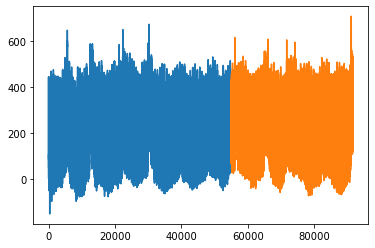

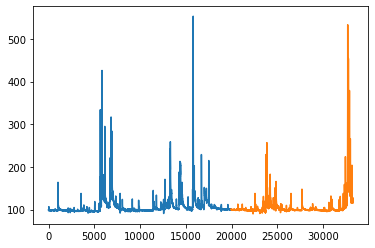

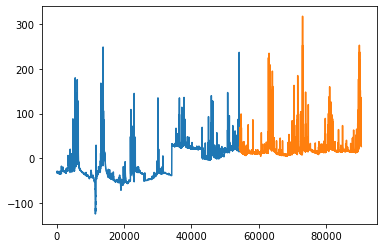

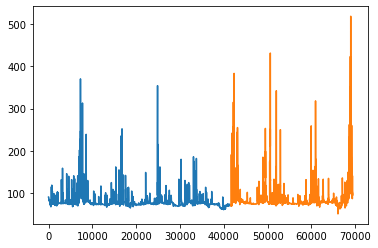

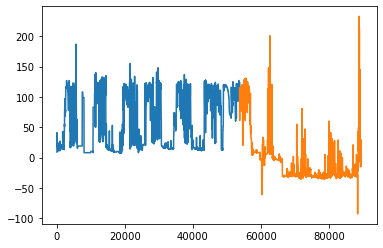

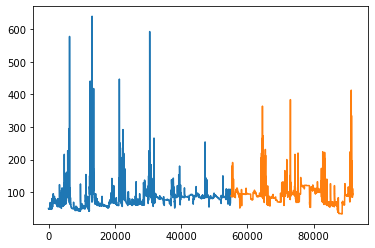

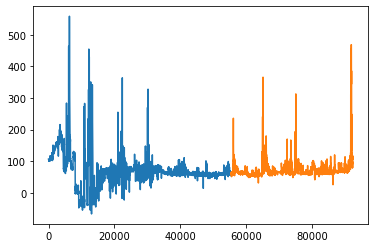

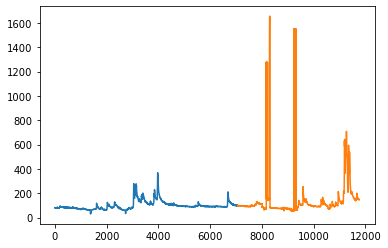

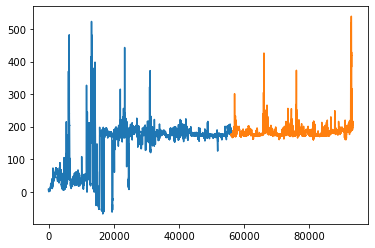

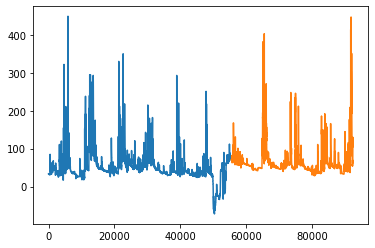

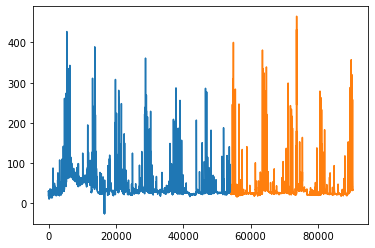

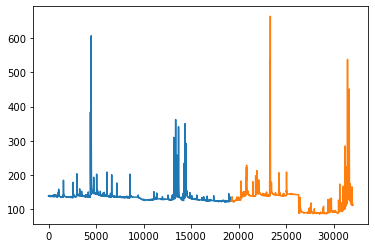

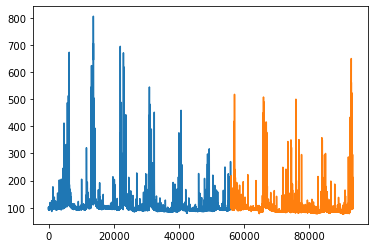

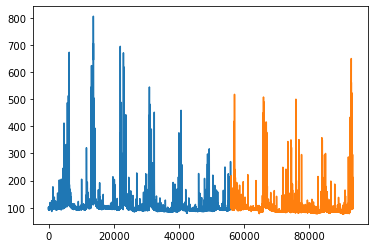

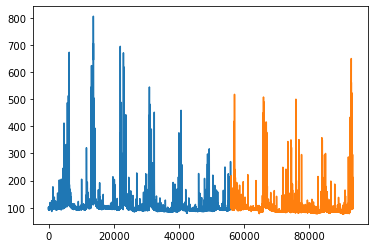

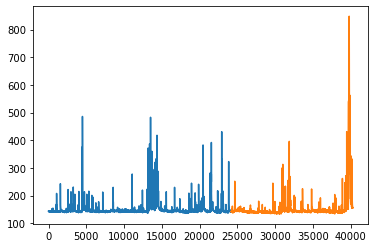

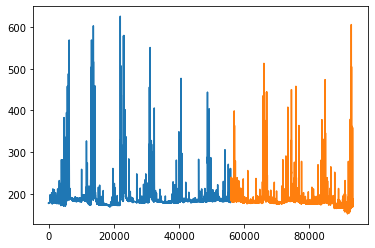

In [499]:
# 파란색 그래프: train data, 노란색 그래프: test data
for i in range(len(df_list)):
    ax = train_value[i].plot()
    test_value[i].plot(ax=ax)
    plt.show()

In [81]:
from sklearn.preprocessing import MinMaxScaler

In [500]:
sc = [MinMaxScaler() for i in range(len(df_list))]

In [501]:
train_arr = [np.array(train_value[i]).reshape(-1,1) for i in range(len(df_list))]

In [502]:
test_arr = [np.array(test_value[i]).reshape(-1,1) for i in range(len(df_list))]

In [503]:
train_sc = [sc[i].fit_transform(train_arr[i]) for i in range(len(df_list))]
test_sc = [sc[i].transform(test_arr[i]) for i in range(len(df_list))]

In [504]:
train_sc[0]

array([[0.13539192],
       [0.14251781],
       [0.152019  ],
       ...,
       [0.02612827],
       [0.02612827],
       [0.02612827]])

In [505]:
train = [df_list[i][df_list[i]['time'] < split_date[i]] for i in range(len(df_list))]
test = [df_list[i][df_list[i]['time'] >= split_date[i]] for i in range(len(df_list))]

In [506]:
for i in range(len(df_list)):
    train[i] = train[i].set_index('time')
    test[i] = test[i].set_index('time')

In [507]:
train[0].head(10)

,value
time,
2010-02-25 12:00:00,3.0
2010-02-25 13:00:00,6.0
2010-02-25 14:00:00,10.0
2010-02-25 15:00:00,14.0
2010-02-25 16:00:00,18.0
2010-02-25 17:00:00,22.0
2010-02-25 18:00:00,25.0
2010-02-25 19:00:00,27.0
2010-02-25 20:00:00,27.0


In [508]:
train_sc_df = [pd.DataFrame(train_sc[i], columns=['std_value'], index=train[i].index) for i in range(len(df_list))]
test_sc_df = [pd.DataFrame(test_sc[i], columns=['std_value'], index=test[i].index)for i in range(len(df_list))]

In [509]:
train_sc_df[0].head(10)

,std_value
time,
2010-02-25 12:00:00,0.135392
2010-02-25 13:00:00,0.142518
2010-02-25 14:00:00,0.152019
2010-02-25 15:00:00,0.161520
2010-02-25 16:00:00,0.171021
2010-02-25 17:00:00,0.180523
2010-02-25 18:00:00,0.187648
2010-02-25 19:00:00,0.192399
2010-02-25 20:00:00,0.192399


In [510]:
for i in range(len(df_list)):
    train[i]['std_value'] = train_sc_df[i]['std_value']
    test[i]['std_value'] = test_sc_df[i]['std_value']
    train[i].drop(['value'], axis=1, inplace=True)
    test[i].drop(['value'], axis=1, inplace=True)

In [511]:
train[0].head(10)

,std_value
time,
2010-02-25 12:00:00,0.135392
2010-02-25 13:00:00,0.142518
2010-02-25 14:00:00,0.152019
2010-02-25 15:00:00,0.161520
2010-02-25 16:00:00,0.171021
2010-02-25 17:00:00,0.180523
2010-02-25 18:00:00,0.187648
2010-02-25 19:00:00,0.192399
2010-02-25 20:00:00,0.192399


In [512]:
for i in range(len(df_list)):
    for s in range(12):
        train[i]['shift_{}'.format(s)] = train[i]['std_value'].shift(s)
        test[i]['shift_{}'.format(s)] = test[i]['std_value'].shift(s)

In [513]:
train[0].head()

,std_value,shift_0,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11
time,,,,,,,,,,,,,
2010-02-25 12:00:00,0.135392,0.135392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-25 13:00:00,0.142518,0.142518,0.135392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-25 14:00:00,0.152019,0.152019,0.142518,0.135392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-25 15:00:00,0.161520,0.161520,0.152019,0.142518,0.135392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-25 16:00:00,0.171021,0.171021,0.161520,0.152019,0.142518,0.135392,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [514]:
X_train = [train[i].dropna().drop('std_value', axis=1) for i in range(len(df_list))]
y_train = [train[i].dropna()[['std_value']] for i in range(len(df_list))]
X_test = [test[i].dropna().drop('std_value', axis=1) for i in range(len(df_list))]
y_test = [test[i].dropna()[['std_value']] for i in range(len(df_list))]

In [515]:
X_train[0].head()

,shift_0,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11
time,,,,,,,,,,,,
2010-02-25 23:00:00,0.194774,0.194774,0.194774,0.192399,0.192399,0.187648,0.180523,0.171021,0.161520,0.152019,0.142518,0.135392
2010-02-26 00:00:00,0.192399,0.194774,0.194774,0.194774,0.192399,0.192399,0.187648,0.180523,0.171021,0.161520,0.152019,0.142518
2010-02-26 01:00:00,0.190024,0.192399,0.194774,0.194774,0.194774,0.192399,0.192399,0.187648,0.180523,0.171021,0.161520,0.152019
2010-02-26 02:00:00,0.187648,0.190024,0.192399,0.194774,0.194774,0.194774,0.192399,0.192399,0.187648,0.180523,0.171021,0.161520
2010-02-26 03:00:00,0.185273,0.187648,0.190024,0.192399,0.194774,0.194774,0.194774,0.192399,0.192399,0.187648,0.180523,0.171021


In [516]:
y_train[0].head(10)

,std_value
time,
2010-02-25 23:00:00,0.194774
2010-02-26 00:00:00,0.192399
2010-02-26 01:00:00,0.190024
2010-02-26 02:00:00,0.187648
2010-02-26 03:00:00,0.185273
2010-02-26 04:00:00,0.182898
2010-02-26 05:00:00,0.180523
2010-02-26 06:00:00,0.178147
2010-02-26 07:00:00,0.175772


In [517]:
print(type(X_train[0]))

<class 'pandas.core.frame.DataFrame'>


In [518]:
X_train = [X_train[i].values for i in range(len(df_list))]
print(type(X_train[0]))

<class 'numpy.ndarray'>


In [519]:
X_test= [X_test[i].values for i in range(len(df_list))]
y_train = [y_train[i].values for i in range(len(df_list))]
y_test = [y_test[i].values for i in range(len(df_list))]

In [520]:
print(X_train[0].shape)
print(y_train[0].shape)

(50682, 12)
(50682, 1)


In [521]:
X_train_t = [X_train[i].reshape(X_train[i].shape[0], 12, 1) for i in range(len(df_list))]
X_test_t = [X_test[i].reshape(X_test[i].shape[0], 12, 1) for i in range(len(df_list))]

In [522]:
print('최종 data')
for i in range(len(df_list)):
    print('dataframe index: ', i)
    print(X_train_t[i].shape)
    print(X_test_t[i].shape)

최종 data
dataframe index:  0
(50682, 12, 1)
(33785, 12, 1)
dataframe index:  1
(50682, 12, 1)
(33785, 12, 1)
dataframe index:  2
(50682, 12, 1)
(33785, 12, 1)
dataframe index:  3
(50682, 12, 1)
(33785, 12, 1)
dataframe index:  4
(19943, 12, 1)
(13292, 12, 1)
dataframe index:  5
(15997, 12, 1)
(10662, 12, 1)
dataframe index:  6
(54292, 12, 1)
(36191, 12, 1)
dataframe index:  7
(52709, 12, 1)
(35137, 12, 1)
dataframe index:  8
(54419, 12, 1)
(36276, 12, 1)
dataframe index:  9
(53163, 12, 1)
(35439, 12, 1)
dataframe index:  10
(49019, 12, 1)
(32676, 12, 1)
dataframe index:  11
(48682, 12, 1)
(32452, 12, 1)
dataframe index:  12
(35014, 12, 1)
(23340, 12, 1)
dataframe index:  13
(19943, 12, 1)
(13293, 12, 1)
dataframe index:  14
(55961, 12, 1)
(37304, 12, 1)
dataframe index:  15
(7048, 12, 1)
(4695, 12, 1)
dataframe index:  16
(35020, 12, 1)
(23343, 12, 1)
dataframe index:  17
(29662, 12, 1)
(19772, 12, 1)
dataframe index:  18
(50221, 12, 1)
(33478, 12, 1)
dataframe index:  19
(55975, 12, 1)

In [172]:
from keras.layers import GRU
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint
import os

In [523]:
K.clear_session()

In [524]:
model = Sequential() # Sequeatial Model 
model.add(GRU(20, input_shape=(12, 1))) # (timestep, feature) 
model.add(Dense(1)) # output = 1 
model.compile(loss='mean_squared_error', optimizer='adam') 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 20)                1380      
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 1,401
Trainable params: 1,401
Non-trainable params: 0
_________________________________________________________________


In [525]:
model_list = [model for i in range(len(df_list))]

In [358]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):      
    os.mkdir(MODEL_DIR)
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose = 1, save_best_only = True)

In [359]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

In [373]:
hist_list = [model_list[i].fit(X_train_t[i], y_train[i], validation_split=0.2, epochs=100,
                               batch_size=30, verbose=1, callbacks=[checkpointer, early_stop])
            for i in range(len(df_list))]

Epoch 1/100
1576/1577 [============================>.] - ETA: 0s - loss: 1.5460e-06
Epoch 00001: val_loss did not improve from 0.00000
1577/1577 [==============================] - 11s 7ms/step - loss: 1.5452e-06 - val_loss: 5.8370e-07
Epoch 2/100
1574/1577 [============================>.] - ETA: 0s - loss: 9.3028e-07
Epoch 00002: val_loss did not improve from 0.00000
1577/1577 [==============================] - 12s 7ms/step - loss: 9.3225e-07 - val_loss: 1.2065e-06
Epoch 3/100
1574/1577 [============================>.] - ETA: 0s - loss: 1.2376e-06
Epoch 00003: val_loss did not improve from 0.00000
1577/1577 [==============================] - 12s 8ms/step - loss: 1.2393e-06 - val_loss: 2.9148e-07
Epoch 00003: early stopping
Epoch 1/100
1571/1577 [============================>.] - ETA: 0s - loss: 1.0032e-06
Epoch 00001: val_loss did not improve from 0.00000
1577/1577 [==============================] - 12s 8ms/step - loss: 9.9996e-07 - val_loss: 2.3562e-07
Epoch 2/100
1571/1577 [=========

In [375]:
y_pred = [model_list[i].predict(X_test_t[i], batch_size=30) for i in range(len(df_list))]

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

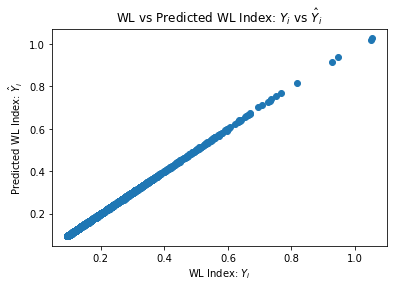

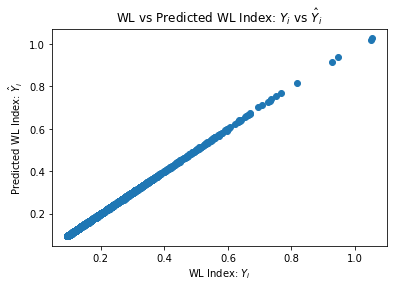

In [376]:
for i in range(len(df_list)):
    plt.scatter(y_test[i], y_pred[i])
    plt.xlabel("WL Index: $Y_i$")
    plt.ylabel("Predicted WL Index: $\hat{Y}_i$")
    plt.title("WL vs Predicted WL Index: $Y_i$ vs $\hat{Y}_i$")
    plt.show()

In [377]:
a_axis = [np.arange(0, len(y_train[i])) for i in range(len(df_list))]
b_axis = [np.arange(len(y_train[i]), len(y_train[i]) + len(y_pred[i])) for i in range(len(df_list))]

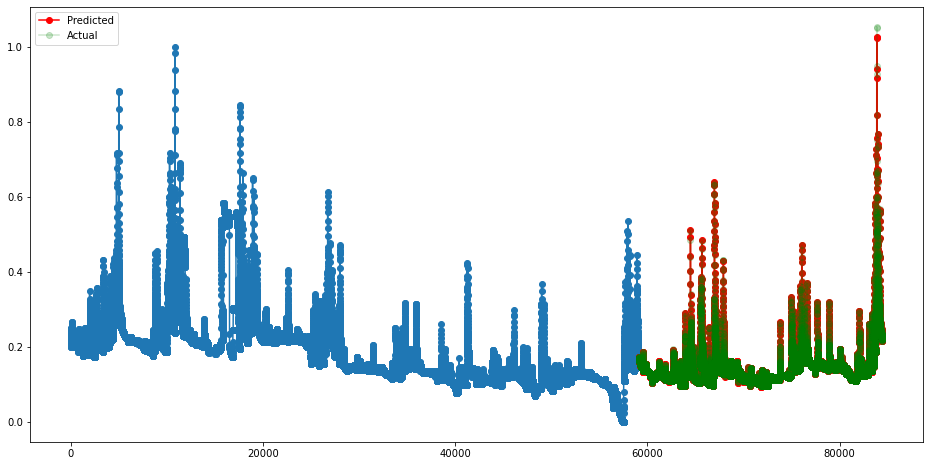

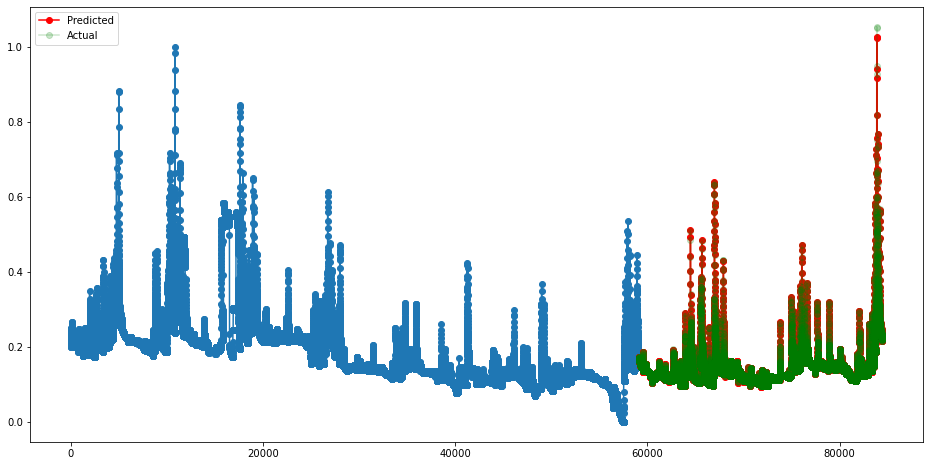

In [378]:
for i in range(len(df_list)):
    plt.figure(figsize=(16,8))
    plt.plot(a_axis[i], y_train[i].reshape(X_train_t[i].shape[0],), 'o-')
    plt.plot(b_axis[i], y_pred[i].reshape(X_test_t[i].shape[0],), 'o-', color='red', label='Predicted')
    plt.plot(b_axis[i], y_test[i].reshape(X_test_t[i].shape[0],), 'o-', color='green', alpha=0.2, label='Actual')
    plt.legend()
    plt.show()

In [453]:
# 학습
model_list[0].fit(X_train_t[0], y_train[0], validation_split=0.2, epochs=100,
                  batch_size=30, verbose=1, callbacks=[checkpointer, early_stop])

Epoch 1/100
1350/1352 [============================>.] - ETA: 0s - loss: 3.3449e-05
Epoch 00001: val_loss did not improve from 0.00000
1352/1352 [==============================] - 15s 11ms/step - loss: 3.3420e-05 - val_loss: 1.7123e-05
Epoch 2/100
1351/1352 [============================>.] - ETA: 0s - loss: 3.6101e-05
Epoch 00002: val_loss did not improve from 0.00000
1352/1352 [==============================] - 14s 11ms/step - loss: 3.6095e-05 - val_loss: 1.4603e-05
Epoch 00002: early stopping


Text(0.5, 1.0, 'WL vs Predicted WL Index: $Y_i$ vs $\\hat{Y}_i$')

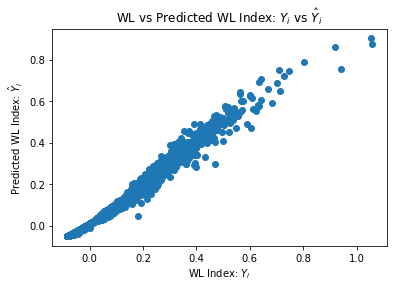

In [417]:
%matplotlib inline
import matplotlib.pyplot as plt

y_pred = model_list[0].predict(X_test_t[0], batch_size=30) # 예측
plt.scatter(y_test[0], y_pred)
plt.xlabel("WL Index: $Y_i$")
plt.ylabel("Predicted WL Index: $\hat{Y}_i$")
plt.title("WL vs Predicted WL Index: $Y_i$ vs $\hat{Y}_i$")

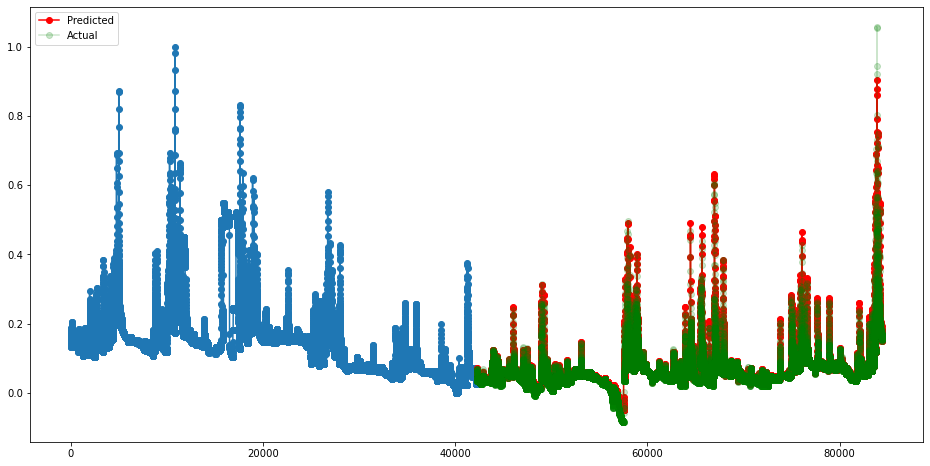

In [419]:
a_axis = np.arange(0, len(y_train[0]))
b_axis = np.arange(len(y_train[0]), len(y_train[0]) + len(y_pred))

plt.figure(figsize=(16,8))
plt.plot(a_axis, y_train[0].reshape(X_train_t[0].shape[0],), 'o-')
plt.plot(b_axis, y_pred.reshape(X_test_t[0].shape[0],), 'o-', color='red', label='Predicted')
plt.plot(b_axis, y_test[0].reshape(X_test_t[0].shape[0],), 'o-', color='green', alpha=0.2, label='Actual')
plt.legend()
plt.show()

In [460]:
model_list[0].fit(X_train_t[0], y_train[0], validation_split=0.2, epochs=100,
                  batch_size=30, verbose=1, callbacks=[checkpointer, early_stop])

Epoch 1/100
1348/1352 [============================>.] - ETA: 0s - loss: 8.6881e-04
Epoch 00001: val_loss did not improve from 0.00000
1352/1352 [==============================] - 15s 11ms/step - loss: 8.6733e-04 - val_loss: 1.8150e-04
Epoch 2/100
1348/1352 [============================>.] - ETA: 0s - loss: 1.4215e-04- ETA: 0s - los
Epoch 00002: val_loss did not improve from 0.00000
1352/1352 [==============================] - 17s 13ms/step - loss: 1.4186e-04 - val_loss: 4.8395e-05
Epoch 3/100
1348/1352 [============================>.] - ETA: 0s - loss: 1.0969e-04
Epoch 00003: val_loss did not improve from 0.00000
1352/1352 [==============================] - 14s 10ms/step - loss: 1.0964e-04 - val_loss: 5.1652e-05
Epoch 4/100
1351/1352 [============================>.] - ETA: 0s - loss: 8.4782e-05
Epoch 00004: val_loss did not improve from 0.00000
1352/1352 [==============================] - 13s 10ms/step - loss: 8.4755e-05 - val_loss: 6.4203e-05
Epoch 5/100
1348/1352 [==================

Text(0.5, 1.0, 'WL vs Predicted WL Index: $Y_i$ vs $\\hat{Y}_i$')

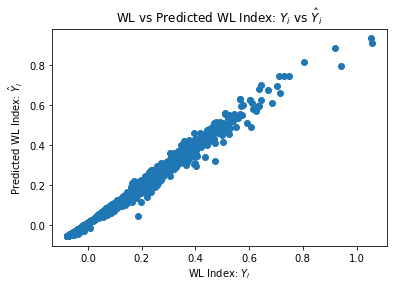

In [461]:
y_pred = model_list[0].predict(X_test_t[0], batch_size=30) # 예측
plt.scatter(y_test[0], y_pred)
plt.xlabel("WL Index: $Y_i$")
plt.ylabel("Predicted WL Index: $\hat{Y}_i$")
plt.title("WL vs Predicted WL Index: $Y_i$ vs $\hat{Y}_i$")

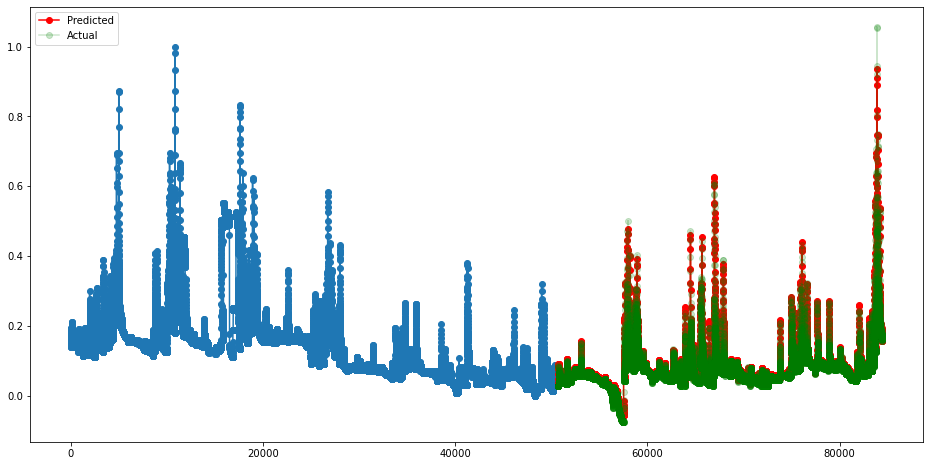

In [462]:
a_axis = np.arange(0, len(y_train[0]))
b_axis = np.arange(len(y_train[0]), len(y_train[0]) + len(y_pred))

plt.figure(figsize=(16,8))
plt.plot(a_axis, y_train[0].reshape(X_train_t[0].shape[0],), 'o-')
plt.plot(b_axis, y_pred.reshape(X_test_t[0].shape[0],), 'o-', color='red', label='Predicted')
plt.plot(b_axis, y_test[0].reshape(X_test_t[0].shape[0],), 'o-', color='green', alpha=0.2, label='Actual')
plt.legend()
plt.show()

In [492]:
model_list[0].fit(X_train_t[0], y_train[0], validation_split=0.2, epochs=100,
                  batch_size=30, verbose=1, callbacks=[checkpointer, early_stop])

Epoch 1/100
1202/1203 [============================>.] - ETA: 0s - loss: 6.8903e-04
Epoch 00001: val_loss did not improve from 0.00000
1203/1203 [==============================] - 8s 7ms/step - loss: 6.8894e-04 - val_loss: 5.5736e-04
Epoch 2/100
1201/1203 [============================>.] - ETA: 0s - loss: 1.5358e-04
Epoch 00002: val_loss did not improve from 0.00000
1203/1203 [==============================] - 9s 7ms/step - loss: 1.5356e-04 - val_loss: 1.0604e-04
Epoch 3/100
1203/1203 [==============================] - ETA: 0s - loss: 1.1012e-04
Epoch 00003: val_loss did not improve from 0.00000
1203/1203 [==============================] - 9s 8ms/step - loss: 1.1012e-04 - val_loss: 8.0329e-05
Epoch 4/100
1202/1203 [============================>.] - ETA: 0s - loss: 9.5550e-05
Epoch 00004: val_loss did not improve from 0.00000
1203/1203 [==============================] - 10s 8ms/step - loss: 9.5530e-05 - val_loss: 2.3808e-05
Epoch 5/100
1198/1203 [============================>.] - ETA: 0

Text(0.5, 1.0, 'WL vs Predicted WL Index: $Y_i$ vs $\\hat{Y}_i$')

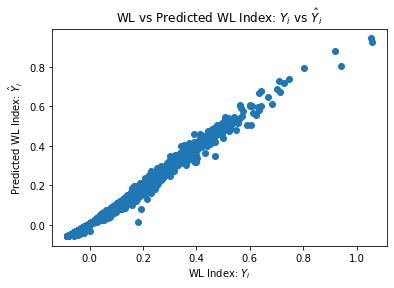

In [493]:
y_pred = model_list[0].predict(X_test_t[0], batch_size=30) # 예측
plt.scatter(y_test[0], y_pred)
plt.xlabel("WL Index: $Y_i$")
plt.ylabel("Predicted WL Index: $\hat{Y}_i$")
plt.title("WL vs Predicted WL Index: $Y_i$ vs $\hat{Y}_i$")

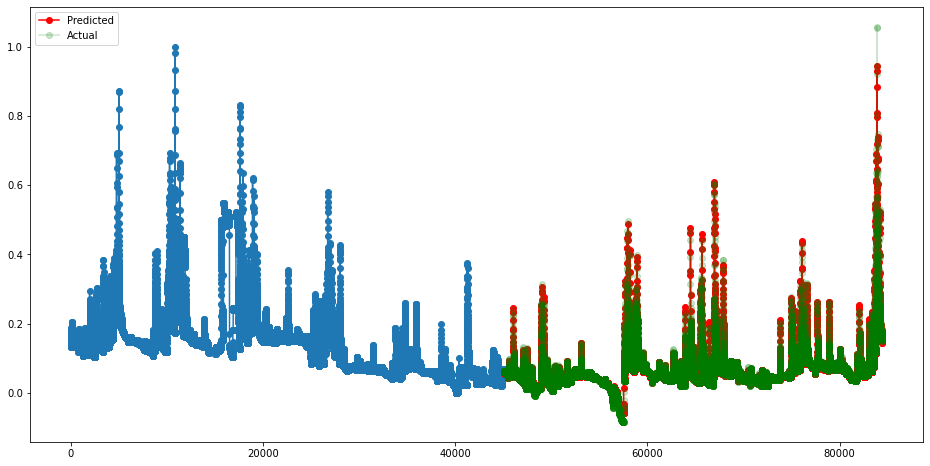

In [494]:
a_axis = np.arange(0, len(y_train[0]))
b_axis = np.arange(len(y_train[0]), len(y_train[0]) + len(y_pred))

plt.figure(figsize=(16,8))
plt.plot(a_axis, y_train[0].reshape(X_train_t[0].shape[0],), 'o-')
plt.plot(b_axis, y_pred.reshape(X_test_t[0].shape[0],), 'o-', color='red', label='Predicted')
plt.plot(b_axis, y_test[0].reshape(X_test_t[0].shape[0],), 'o-', color='green', alpha=0.2, label='Actual')
plt.legend()
plt.show()